In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import olac

ModuleNotFoundError: No module named 'olac'

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
base_center = (0,0,)
base_var = 5
n_points = 150
n_satellites = 3
satellite_var = 1
contamination = 0.1

In [4]:
np.random.seed(1)
for p in olac.utils.slide_probability_over_list(6, 3, 1, 0.1):
    print(np.random.choice([1,2,3], p=p))
    

1
2
3
1
2
3


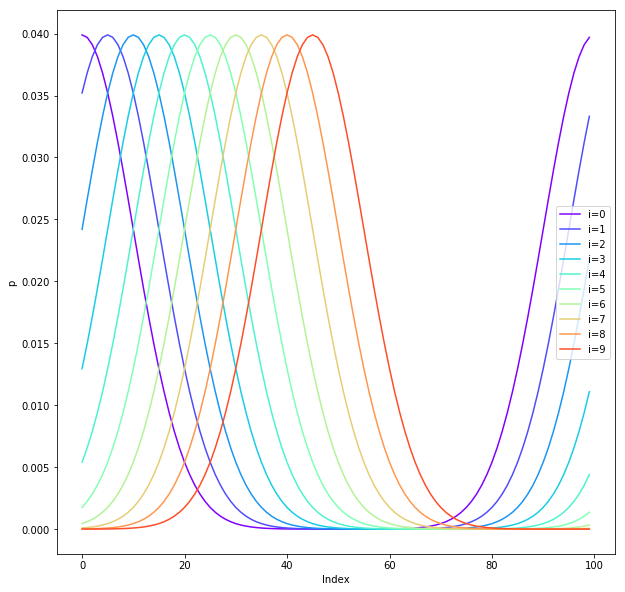

In [26]:
cm = plt.cm.get_cmap('rainbow')
n=10
for i, p in enumerate(olac.utils.slide_probability_over_list(n, 100, 5, 10)):
    plt.plot(p, label=f'i={i}', color=cm(i/n))
plt.legend()
plt.xlabel('Index')
plt.ylabel('p');

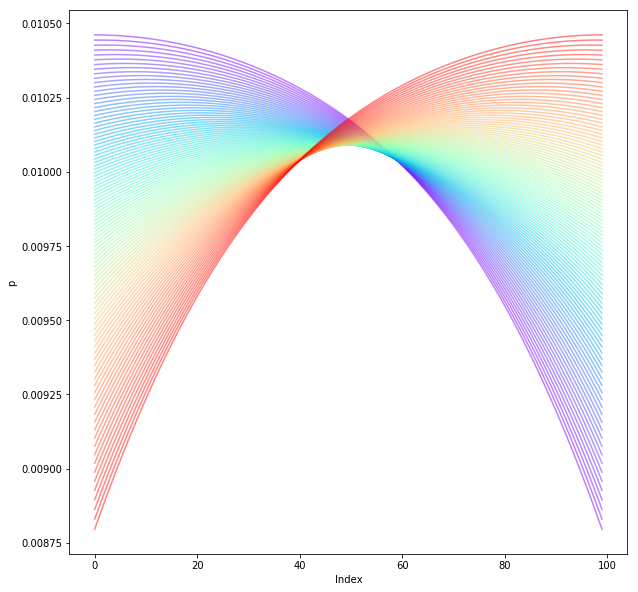

In [42]:
cm = plt.cm.get_cmap('rainbow')
n=100
for i, p in enumerate(olac.utils.slide_probability_over_list(n, 100, 1, 60)):
    plt.plot(p, label=f'i={i}', color=cm(i/n), alpha=0.5)
# plt.legend()
plt.xlabel('Index')
plt.ylabel('p');

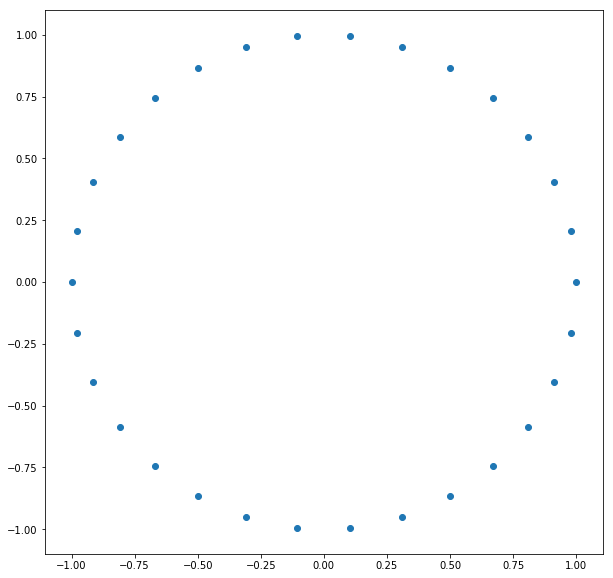

In [6]:
plt.scatter(*olac.utils.unit_circle_points(30).T)

In [7]:
x_list = []
satellite_probs = olac.utils.slide_probability_over_list(n_points, n_satellites, 1/n_points, var=0.8)
for i, p in enumerate(satellite_probs):
    
    outlier = np.random.uniform(0,1) < contamination
    label = int(outlier)
    satellite_centers = (3*base_var * olac.utils.unit_circle_points(n_satellites)) + np.array(base_center)
    if not outlier:
#         width = 2*np.abs(np.random.standard_normal())
        x = np.random.normal(loc=base_center, scale=base_var)

    else:
        satellite = np.random.choice(list(range(n_satellites)), p=p)
        x = np.random.normal(loc=satellite_centers[satellite], scale=satellite_var)
    
    x = list(x) + [label]
    x_list.append(x)

x_df = pd.DataFrame(x_list, columns=['x1','x2','label'])

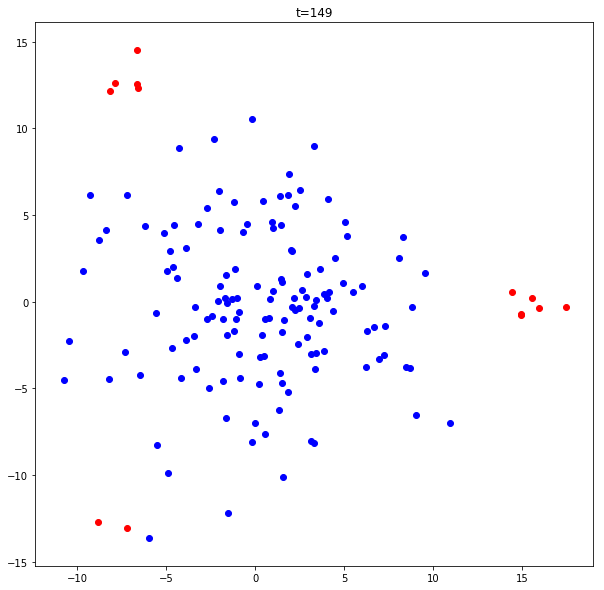

In [8]:
from IPython import display

colors = ['b','r']

for t, x in enumerate(x_list):
    plt.scatter(*x[:2], color=colors[int(x[-1])])
    plt.title(f't={t}')
    display.clear_output(wait=True)
    display.display(plt.gcf())

display.clear_output()

# ax = x_df[x_df['label']==0].plot.scatter('x1','x2', c='b', alpha=0.5)
# ax = x_df[x_df['label']==1].plot.scatter('x1','x2', c='r', alpha=1, ax=ax)